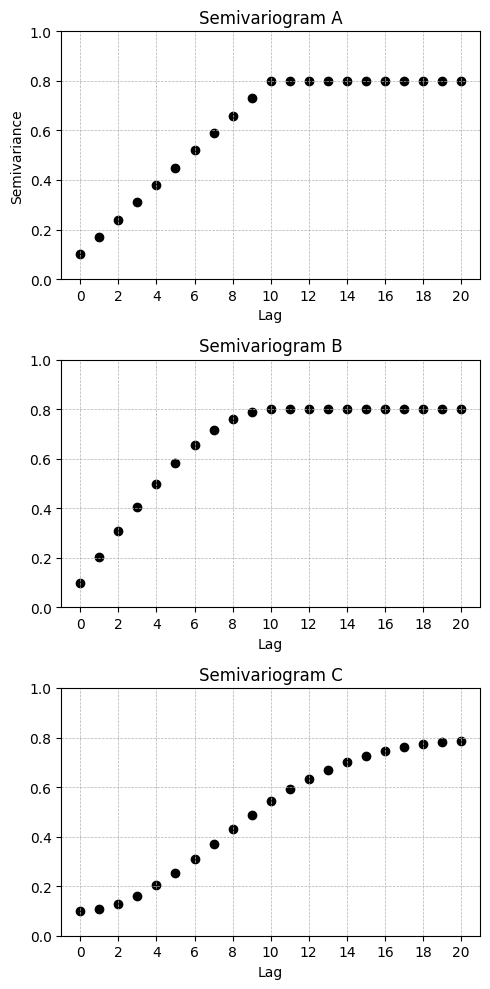

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define semivariogram models
def linear_variogram(h, nugget=0.1, sill=0.8, rng=10):
    """Linear semivariogram model."""
    return nugget + (sill - nugget) * np.minimum(h / rng, 1)

def spherical_variogram(h, nugget=0.1, sill=0.8, rng=10):
    """Spherical semivariogram model."""
    return np.where(h <= rng,
                    nugget + (sill - nugget) * (1.5 * (h / rng) - 0.5 * (h / rng) ** 3),
                    sill)

def gaussian_variogram(h, nugget=0.1, sill=0.8, rng=10):
    """Gaussian semivariogram model."""
    return nugget + (sill - nugget) * (1 - np.exp(- (h ** 2) / (rng ** 2)))

# Generate lag values
lags = np.arange(0, 21, 1)  # 0 to 20
noise = np.random.normal(0, 0.015, len(lags))  # Add random noise

# Compute semivariogram values with noise
linear_values = linear_variogram(lags)
spherical_values = spherical_variogram(lags)
gaussian_values = gaussian_variogram(lags)

# Plot the semivariograms
fig, axes = plt.subplots(3, 1, figsize=(5, 10), sharey=True)

# Plot Linear Semivariogram
axes[0].scatter(lags, linear_values, color='k')
axes[0].set_title('Semivariogram A')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Semivariance')
axes[0].set_ylim(0,1)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[0].set_xticks(np.arange(0, 21, 2))

# Plot Spherical Semivariogram
axes[1].scatter(lags, spherical_values, color='k')
axes[1].set_title('Semivariogram B')
axes[1].set_xlabel('Lag')
axes[1].set_ylim(0,1)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[1].set_xticks(np.arange(0, 21, 2))

# Plot Gaussian Semivariogram
axes[2].scatter(lags, gaussian_values, color='k')
axes[2].set_title('Semivariogram C')
axes[2].set_xlabel('Lag')
axes[2].set_ylim(0,1)
axes[2].grid(True, which='both', linestyle='--', linewidth=0.5)
axes[2].set_xticks(np.arange(0, 21, 2))

# Adjust layout
plt.tight_layout()
plt.show()